Bitte in MemBrain oder sonstwo die Quadratzahlen lernen lassen. 

Bereitet eine kurze Präsentation eurer Ergebnisse vor: 

- Variation des Netzes in 3...4 Details (zB anZahl Knoten oder Layer, Variation der Aktivierungsfunktion, ...) 
- Wann macht das Netz was? Dafür die Werte VISUALISIEREN, als x-y-Plot. 
- Dann bitte eure Lösungsvariationen beschreiben und bewerten. Besonders wichtig: Was macht das Netz mit Zahleninputs weit außerhalb des Trainingsbereiches (Extrapolation)?
- Was ist das kleinst mögliche Netz, das einfachste Netz, was akzeptable Ergebnisse liefert?

Gerne als Video upload (s. AUFGAB unten), oder als PDF mit Screenshots, oder LIVE beim nächsten Mal zeigen!


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from matplotlib import pyplot as plt

2022-10-12 10:21:07.952687: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
""" model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1,  0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13], dtype=int)
ys = np.array([1,0,1,4,9,16,25,36,49,64,81,100,121,144,169],dtype=int)

model.fit(xs, ys, epochs=500)
print(model.predict([14])) """

" model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])\nmodel.compile(optimizer='sgd', loss='mean_squared_error')\n\nxs = np.array([-1,  0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13], dtype=int)\nys = np.array([1,0,1,4,9,16,25,36,49,64,81,100,121,144,169],dtype=int)\n\nmodel.fit(xs, ys, epochs=500)\nprint(model.predict([14])) "

## Methods

In [16]:
def build_model(learning_rate):
    # Most keras models are sequential, which only contains one or two layers.
    model = tf.keras.Sequential()

    # simple linear regression model contains one layer with one node
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    #model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # compile into code
    model.compile(
        optimizer=tf.optimizers.RMSprop(lr=learning_rate),
        loss="mean_squared_error",
        metrics=[tf.metrics.RootMeanSquaredError()],
    )
    return model


def train_model(model, feature, label, epochs, batch_size):
    # Train the model with feature  (x values) and labels (y values) to find the correlation. the model will train for the number of epochs
    # One example consists of a feature and one or more labels.
    # One batch consists of multiple examples. A batch size of 6 consists of 6 examples (SGD is 1).

    feeded_data = model.fit(x=feature, y=label, batch_size=batch_size, epochs=epochs)

    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    print(f"Trained Weight: {trained_weight}, Trained Bias {trained_bias}")

    # store list of epochs seperately
    epochs = feeded_data.epoch

    # snapshot of each epoch
    hist = pd.DataFrame(feeded_data.history)

    # root means square error at each epoch
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

## Plot Methods


In [6]:
def plot_model(trained_weight, trained_bias, feature, label):
    # Plot trained model against feature and label

    plt.xlabel("feature")
    plt.ylabel("label")

    plt.scatter(feature,label, c="b")

    x0 = 0
    y0 = trained_bias

    # red line shows the model
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    model_plot = plt.plot([x0,x1], [y0,y1], c="r")
    return model_plot


def plot_loss(epochs,rmse):
    plt.figure()
    plt.xlabel("epochs")
    plt.ylabel("rmse")

    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    loss_plot = plt.plot(epochs,rmse, label="Loss")
    return loss_plot

def plot(trained_weight, trained_bias, feature, label,epochs,rmse):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12, 8))
    ax1.scatter(feature,label, c="b",label="examples")
    ax1.set_xlabel("feature")
    ax1.set_ylabel("label")
    x0 = 0
    y0 = trained_bias

    # red line shows the model
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    ax1.plot([x0,x1], [y0,y1], c="r",label="trained_model")

    ax2.set_ylim([rmse.min()*0.97, rmse.max()])
    ax2.set_xlabel("epochs")
    ax2.set_ylabel("rmse")
    ax2.plot(epochs,rmse, label="Loss")
    fig.legend()
    fig.show()


## Dataset

In [7]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
#my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

my_label = [x*x for x in my_feature]
print(my_label)

[1.0, 4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64.0, 81.0, 100.0, 121.0, 144.0]


## Hyperparameters
 - learning rate
 - epochs
 - batch size

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has converged.
Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge.

The model calculates the weight and bias after one iteration. One iteration equals the processing of one batch with a batch size of 6 examples, for example. 

One epoch spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.
It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge.

Epoch 1/350
1/1 [==============================] - 0s 433ms/step - loss: 6096.8110 - root_mean_squared_error: 78.0821
Epoch 2/350
1/1 [==============================] - 0s 4ms/step - loss: 5412.8701 - root_mean_squared_error: 73.5722
Epoch 3/350
1/1 [==============================] - 0s 3ms/step - loss: 4958.5767 - root_mean_squared_error: 70.4172
Epoch 4/350
1/1 [==============================] - 0s 4ms/step - loss: 4602.0547 - root_mean_squared_error: 67.8384
Epoch 5/350
1/1 [==============================] - 0s 3ms/step - loss: 4302.5967 - root_mean_squared_error: 65.5942
Epoch 6/350
1/1 [==============================] - 0s 4ms/step - loss: 4041.5730 - root_mean_squared_error: 63.5734
Epoch 7/350
1/1 [==============================] - 0s 3ms/step - loss: 3808.6980 - root_mean_squared_error: 61.7146
Epoch 8/350
1/1 [==============================] - 0s 4ms/step - loss: 3597.6145 - root_mean_squared_error: 59.9801
Epoch 9/350
1/1 [==============================] - 0s 3ms/step - loss:

/var/folders/j2/c0v43hz942nb38rd8bm2d_240000gn/T/ipykernel_83077/703381744.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


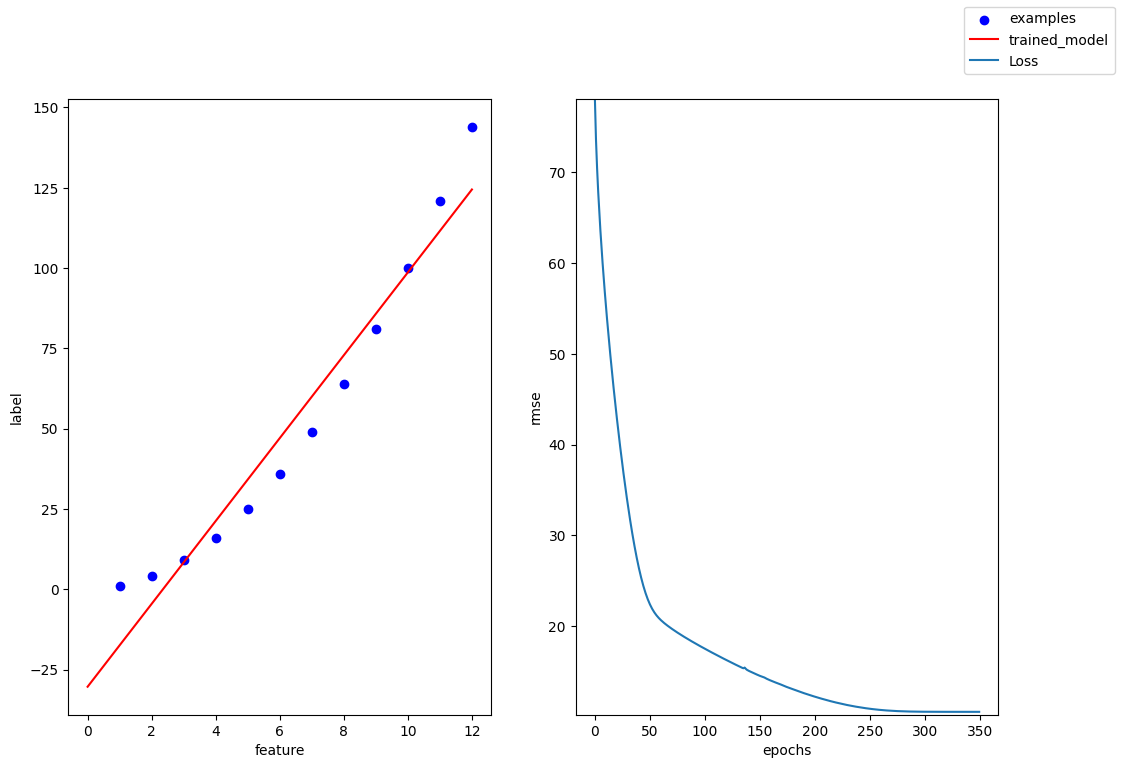

In [17]:
learning_rate = 0.18
epochs = 350
batch_size = 12

my_model = build_model(learning_rate=learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(
    model=my_model,
    feature=my_feature,
    label=my_label,
    epochs=epochs,
    batch_size=batch_size,
)

#plot_model(trained_weight=trained_weight,trained_bias=trained_bias,feature=my_feature,label=my_label)
#plot_loss(epochs=epochs,rmse=rmse)
plot(trained_weight,trained_bias,my_feature,my_label,epochs,rmse)
loss_df = pd.DataFrame(rmse)
print(loss_df.tail(10))
print(my_model.predict([13.0]))


## Summary of hyperparameter tuning
Most machine learning problems require a lot of hyperparameter tuning. Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly. You must experiment to find the best set of hyperparameters for your dataset. 
That said, here are a few rules of thumb:
- Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
- If the training loss does not converge, train for more epochs.
- If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
- If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
- Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
- Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
- For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.